In [5]:
model_path = '/content/drive/My Drive/Colab Notebooks/trained_animal_model'

In [6]:
!pip install transformers
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import files
import os
from IPython.display import clear_output
from transformers import AutoImageProcessor
from transformers import TFAutoModelForImageClassification
import keras
import keras.layers as layers
import tensorflow as tf

checkpoint = "google/vit-base-patch16-224-in21k"
image_processor = AutoImageProcessor.from_pretrained(checkpoint)
model_path = '/content/drive/My Drive/Colab Notebooks/trained_animal_model'
model = TFAutoModelForImageClassification.from_pretrained(model_path)

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
All model checkpoint layers were used when initializing TFViTForImageClassification.

All the layers of TFViTForImageClassification were initialized from the model checkpoint at /content/drive/My Drive/Colab Notebooks/trained_animal_model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFViTForImageClassification for predictions without further training.


Saving 989.jpeg to 989.jpeg


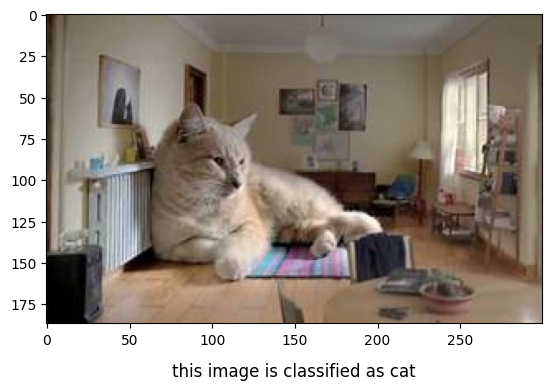

In [ ]:
while True:
  uploaded = files.upload()
  uploaded_name = list(uploaded.keys())[0]
  extension = uploaded_name.split('.')[1]
  os.rename(uploaded_name, 'temp' + '.' + extension)
  image = Image.open('temp' + '.' + extension)
  image = image.convert("RGB")
  inputs = image_processor(image, return_tensors="tf")
  logits = model(**inputs).logits
  predicted_class_id = int(tf.math.argmax(logits, axis=-1)[0])
  label = model.config.id2label[predicted_class_id]
  plt.imshow(image)
  plt.title('this image is classified as ' + label, y=-0.2)
  plt.show()
  input('press enter to continue...\n')
  clear_output(wait=True)
